# Задание рубежного контроля и входные данные

# ИУ5-64Б Драгун И.А.
## Рубежный контроль №2 (вариант 4)

### Задание

- Для заданного набора данных построить модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). 
- Для построения моделей использовать методы 1 и 2.
- Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
- Оценить качество моделей на основе подходящих метрик качества (не менее двух метрик). 
- Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? 

### Методы

- Метод 1 - Линейная/логистическая регрессия
- Метод 2 - Градиентный бустинг

### Набор данных 4.

Доступен по адресу: https://www.kaggle.com/carlolepelaars/toy-dataset

# Ячейки Jupyter-ноутбука

## Текстовое описание датасета

В качестве набора данных используется датасет с вымышленными данными. Он имеет следующие атрибуты:

- Number - порядковый номер - индекс для каждой строки
- City - город - город проживания человека
- Gender - пол - пол человека
- Age - возраст - сколько человеку лет
- Income - доход - годовой доход человека
- Illness - болезнь - болеет ли человек

## Импорт библиотек и загрузка данных

Импортируем необходимые библиотеки:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасет:

In [3]:
data = pd.read_csv('toy_dataset.csv')

Выведем первые 5 строк датасета:

In [4]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Определим размер датасета:

In [5]:
data.shape

(109120, 6)

Определим типы столбцов:

In [6]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

Часть столбцов имеют тип Object. Потребуется преобразование этих столбцов в числовые типы данных.

Уберем предупреждения:

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Удаление столбцов

Столбец Number не нужен для дальнейшего анализа, поэтому удалим его:

In [8]:
data = data.drop(columns=['Number'], axis=1)

In [9]:
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Преобразование типов данных

Проверим уникальные значения для столбца Сity:

In [21]:
data['City'].unique()

array([0, 3, 1, 2])

В качестве значений в столбце City могут быть следующие города: Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin. Таких значений 8.

Проверим уникальные значения для столбца Gender:

In [22]:
data['Gender'].unique()

array([1, 0])

В столбце Gender 2 варианта - Male или Female.

Проверим уникальные значения для столбца Illness:

In [23]:
data['Illness'].unique()

array([0, 1, 2])

В столбце Illness тоже 2 варианта - No или Yes.

Эти три столбца можно отнести к категориальным признакам.

Уникальные значения категориальных признаков можно кодировать целыми числами. Для этого можно использовать LabelEncoder из Scikit-learn.

Импортируем LabelEncoder: 

In [24]:
from sklearn.preprocessing import LabelEncoder

Преобразуем столбец City:

In [25]:
letypecity = LabelEncoder()
learrcity = letypecity.fit_transform(data["City"])
data["City"] = learrcity
data = data.astype({"City":"int64"})

Проверим преобразование:

In [26]:
np.unique(learrcity)

array([0, 1, 2, 3])

Аналогично преобразуем столбцы Gender и Illness:

In [27]:
letypegender = LabelEncoder()
learrgender = letypegender.fit_transform(data["Gender"])
data["Gender"] = learrgender
data = data.astype({"Gender":"int64"})

In [28]:
np.unique(learrgender)

array([0, 1])

In [29]:
letypeill = LabelEncoder()
learrill = letypeill.fit_transform(data["Illness"])
data["Illness"] = learrill
data = data.astype({"Illness":"int64"})

In [30]:
np.unique(learrill)

array([0, 1, 2])

Выведем типы столбцов после преобразования:

In [31]:
data.dtypes

City         int64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

## Проверка наличия пропусков

Проверим наличие пропусков:

In [32]:
data.isnull().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Пропусков не наблюдается.

Все предварительные преобразования были совершены, можно приступать к построению моделей.

## Разделение выборки на обучающую и тестовую

Разделим выборку по столбцу City с помощью функции train_test_split:

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, data.City, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((81840, 5), (81840,), (27280, 5), (27280,))

## Построение моделей классификации

### Логистическая регрессия

Построим модель логистической регрессии с помощью LogisticRegression:

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [38]:
targ_logistic = model_logistic.predict(X_test)

Градиентный бустинг

*Построим* модель градиентного бустинга с помощью RandomForestClassifier с числом соседей = 5:

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
model_boost = AdaBoostClassifier()
model_boost.fit(X_train, y_train)

AdaBoostClassifier()

In [44]:
targ_boost = model_boost.predict(X_test)

## Оценка качества моделей

Для оценки качества моделей классификации будем использовать две метрики - Accuracy и матрицу ошибок Confusion Matrix. Именно эти две метрики были выбраны, так как они помогают посчитать процент верно определенных городов и отобразить наглядно классифицированные данные.

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Метрика Accuracy

Метрика вычисляет долю в диапазоне от 0 до 1 правильно определенных классов (в нашем случае городов).

Проверим точность по всем городам:

In [46]:
accuracy_score(y_test, targ_logistic)

0.5928519061583578

In [47]:
accuracy_score(y_test, targ_boost)

0.9381598240469208

Видно, что точность всех классов у модели случайного леса выше, чем у модели логистической регрессии.

Проверим для каждого города из City:

In [48]:
from typing import Dict, Tuple

In [49]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики Accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики Accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Город \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [50]:
print_accuracy_score_for_classes(y_test, targ_logistic)

Город 	 Accuracy
0 	 0.8021272325908088
1 	 0.0
2 	 0.0
3 	 0.9645120405576679


In [51]:
print_accuracy_score_for_classes(y_test, targ_boost)

Город 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.0
3 	 1.0


Наблюдаем более высокую точность у модели случайного леса.

### Метрика Confusion Matrix

Построим соответствующие матрицы:

In [52]:
confusion_matrix(y_test, targ_logistic, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 3997,     0,     0,   986,     0,     0,     0,     0],
       [  369,     0,     0,  7617,     0,     0,     0,     0],
       [    0,     0,     0,  1687,     0,     0,     0,     0],
       [  448,     0,     0, 12176,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0]])

In [53]:
confusion_matrix(y_test, targ_boost, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 4983,     0,     0,     0,     0,     0,     0,     0],
       [    0,  7986,     0,     0,     0,     0,     0,     0],
       [    0,  1687,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0, 12624,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0]])

Визуализируем их:

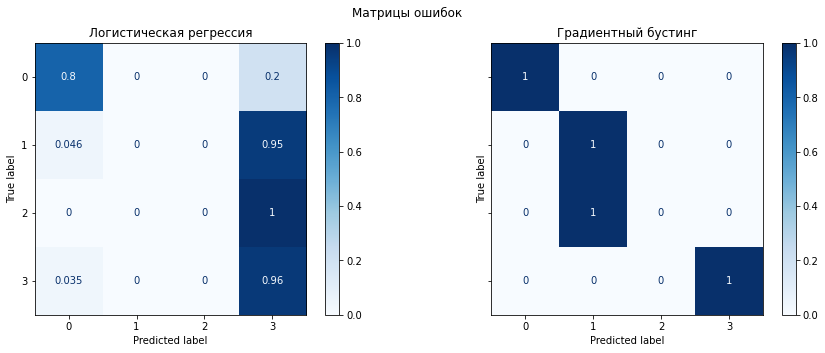

In [54]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

ConfusionMatrixDisplay.from_estimator(
        model_logistic,
        X_test,
        y_test,
        display_labels=model_logistic.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
        ax=ax[0]
    )

ConfusionMatrixDisplay.from_estimator(
        model_boost,
        X_test,
        y_test,
        display_labels=model_boost.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
        ax=ax[1]
    )

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('Логистическая регрессия')
ax[1].title.set_text('Градиентный бустинг')

Видно, что модель градиентного спуска обладает высокой точностью.